**Gradient Descent** can optimize polynomial functions, clusters and linear models and others as well. This is the strength of **GD**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# represents a linear dataset in two dimensions of height weight
weight_height = np.array([[242.,23.2],
                          [290.,24.0],
                          [340.,23.9],
                          [363.,26.3],
                          [430.,26.5],
                          [450.,26.8],
                          [500.,26.8],
                          [720.,32.0],
                          [714.,32.7],
                          [850.,32.8],
                          [920.,33.5],
                          [920.,35.0],
                          [955.,35.0],
                          [925.,36.2],
                          [975.,37.4],
                          [950.,38.0]])

Text(0, 0.5, 'height')

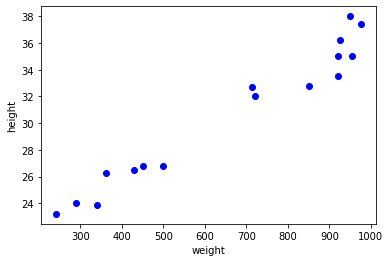

In [3]:
plt.plot(weight_height[:, 0], weight_height[:, 1], "ob")

plt.xlabel("weight")
plt.ylabel("height")

The question is how we can now fit a line to the data, <br>
Since we see a linear trend, we use the function of a line to do so: <br>
$y = m*x + b$, where 
* $x$ is the x value, or weight we plop in to infer the height
* $m$ is the slope of the line
* $b$ is the y - intercept

<br>
predicted_height = intercept + slope * weight

Now we need to pick a **Loss function** to determine how well our fitting is doing. <br>
Here we choose the **Sum of the squared residuals** as our loss. <br>
$RSS = \sum\limits_{i=1}^{n}(y_i - f(x_i))^2$ <br>
* $y_i$ - actual value
* $f(x_i)$ - predicted value, from a function we want to fit <br>
We basically calculate our guess given 'weight' on our new function and see how far off we are compared to the **RSS** function

In our case , the $f(x)$ is the linear function we want to fit, and $x_i$ is the predicted value of our *i-th* data - point. <br>
Our RSS thus equates to:

$RSS = \sum\limits_{i=1}^{n}(y_i - (m * x_i + b))^2$ <br>

### Squared Residuals as derivative

We have two unknown variables we want to optimize in our model: <br>
* m $\rightarrow$ slope
* b $\rightarrow$ intercept
These are our two "knobs" to influence the function for fitting. <p>

We'll use partial derivatives on *slope* and *intercept* to calculate the gradient $-\nabla(slope, intercept)$ <br>
    
*partial derivative of the Loss function RSS in respect to the intercept* <br>
**To derive this we need make use of the chain rule of $f'(RSS)$** = $\sum\limits_{i=1}^{n} -2 * (y_i - (m * x_i + b))$
<br> As listed in the *RSS* we do this for **all of our datapoints** for **both** - **intercept and slope**
<br> This results in the **SLOPES** of the Gradients of slope and y-intercept <p>
\begin{equation}
\begin{aligned}
\frac{\partial RSS}{\partial intercept} & = \ (1.4 - (slope * 0.5 + intercept ))^2 \\
                                        & + \ (1.9 - (slope * 2.3 + intercept ))^2 \\
                                        & + \ (3.2 - (slope * 2.9 + intercept ))^2
\end{aligned}
\end{equation}
    
\begin{equation}
\begin{aligned}
\frac{\partial RSS}{\partial slope}     & = \ (1.4 - (slope * 0.5 + intercept ))^2 \\
                                        & + \ (1.9 - (slope * 2.3 + intercept ))^2 \\
                                        & + \ (3.2 - (slope * 2.9 + intercept ))^2
\end{aligned}
\end{equation}
<br>
After calculating the gradient we can now plug in our first intial guesses of *slope = 1* and *intercept = 0* 
<br>
$\frac{\partial RSS}{\partial intercept} = -1.6 $ <br>
$\frac{\partial RSS}{\partial slope} = -0.8 $
    
<p>
Now we can plug in our results in the **Step - Size formula**, which allows us to control the stepsize through a given **learning rate = 0.01** <br>
    
$Step Size_{intercept} = -1.6 * LearningRate$ <br>
$Step Size_{slope} = -0.8 * LearningRate$ <br>

$newIntercept = oldIntercept - StepSize_{intercept}$ <br>
$newSlope = oldSlope - StepSize_{slope}$
<p>

Finally - we keep repeating this gradient descent until the stepsize becomes very small, or after a given max size of steps.
    



In [4]:
weight_lenght = np.array([[242.,23.2],
                          [290.,24.0],
                          [340.,23.9],
                          [363.,26.3],
                          [430.,26.5],
                          [450.,26.8],
                          [500.,26.8],
                          [720.,32.0],
                          [714.,32.7],
                          [850.,32.8],
                          [920.,33.5],
                          [920.,35.0],
                          [955.,35.0],
                          [925.,36.2],
                          [975.,37.4],
                          [950.,38.0]])


weight_lenght /= 100
weight_height = weight_lenght


In [5]:
# remember -> chain rule derivative of outer * derivative of inner function!
d_rss_intercept = lambda x_0, x_1, slope, y_ic: -2*(x_1 - (y_ic + x_0*slope))
d_rss_slope = lambda x_0, x_1, slope, y_ic: -2*x_0*(x_1 -(y_ic + x_0*slope))

the slope is 0.01874135900327744
the intercept is 0.18230841507356224


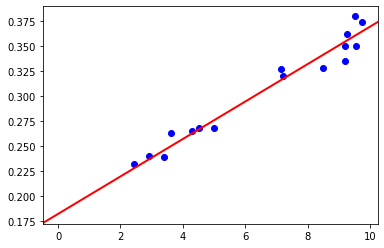

In [6]:
# start slope
s_slope = 1
# start y-intercept
s_y_intercept = 0
learning_rate = 0.001


def regression_line(x):
    return s_slope*x + s_y_intercept


for epoch in range(int(1e3)):
    
    slope_sum = sum([d_rss_slope(weight, height, s_slope, s_y_intercept) for weight, height in weight_height])
    intercept_sum = sum([d_rss_intercept(weight, height, s_slope, s_y_intercept) for weight, height in weight_height])
                    
    intercept_stpsz = intercept_sum * learning_rate
    slope_stpsz = slope_sum * learning_rate

    s_slope -= slope_stpsz
    s_y_intercept -= intercept_stpsz
        

plt.plot(weight_height[:, 0], weight_height[:, 1], "ob")
print(f'the slope is {s_slope}')
print(f'the intercept is {s_y_intercept}')
plt.axline([0, regression_line(0)], [3, regression_line(3)], linewidth=2, color='r')

